<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/classification_with_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [ ]:
from huggingface_hub import list_datasets

all_dataset=list(list_datasets())
print(f'total num of datasets:{len(all_dataset)}')
print(f'first 10 dataset:{all_dataset[:10]}')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


total num of datasets:394273
first 10 dataset:[DatasetInfo(id='openbmb/Ultra-FineWeb', author='openbmb', sha='36a6465a6c39d944c73940ee6c584cce99d5f841', created_at=datetime.datetime(2025, 3, 6, 5, 11, 34, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 5, 9, 2, 12, 8, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=4382, downloads_all_time=None, likes=61, paperswithcode_id=None, tags=['task_categories:text-generation', 'language:en', 'language:zh', 'size_categories:n>1T', 'arxiv:2505.05427', 'arxiv:2412.04315', 'region:us'], trending_score=44, card_data=None, siblings=None, xet_enabled=None), DatasetInfo(id='PrimeIntellect/INTELLECT-2-RL-Dataset', author='PrimeIntellect', sha='d237eba2890e7addc4bf3bf9d95832b65a9c90a7', created_at=datetime.datetime(2025, 4, 7, 23, 26, 35, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 5, 13, 3, 14, 35, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False

In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [ ]:
from datasets import load_dataset

emotions=load_dataset('emotion')
print(emotions)

HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/emotion/resolve/main/README.md
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/emotion/resolve/main/README.md
Retrying in 2s [Retry 2/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/emotion/resolve/main/README.md
Retrying in 4s [Retry 3/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/emotion/resolve/main/README.md
Retrying in 8s [Retry 4/5].


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
#apachi arrow

In [ ]:
train_ds=emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
train_ds[:5] #ilk 5 setri gaytarir

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [ ]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

#What if my dataset is not on the hub

In [ ]:
dataset_url= "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2025-05-17 10:07:28--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 18.160.143.32, 18.160.143.99, 18.160.143.75, ...
Connecting to huggingface.co (huggingface.co)|18.160.143.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  --.-KB/s    in 0.1s    

2025-05-17 10:07:29 (11.8 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [ ]:
!head -n 3 train.txt # ilk uc setri oxu

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger


In [ ]:
emotions_local=load_dataset('csv',data_files='train.txt',sep=';',names=['text','label'])

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# #simples
# dataset_url="https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
# emotions_remote=load_dataset('csv',data_files)

#From datasets to pandas

In [ ]:
import pandas as pd

emotions.set_format(type='pandas')
df=emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)
df['label_name']=df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


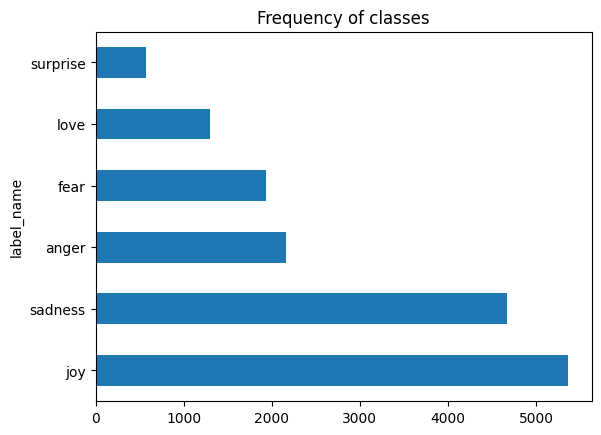

In [ ]:
import matplotlib.pyplot as plt
df['label_name'].value_counts().plot.barh()
plt.title('Frequency of classes')
plt.show()

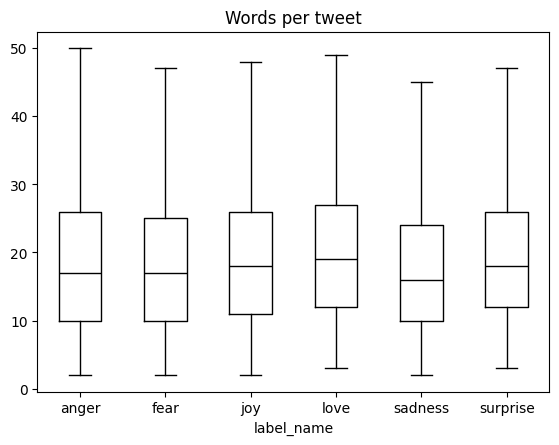

In [ ]:
df['Words per tweet']=df['text'].str.split().apply(len)
df.boxplot('Words per tweet',by='label_name',grid=False,showfliers=False,color='black') #showfliers outliers gostersin ya yox
plt.suptitle('')
plt.show()

In [ ]:
df['Words per tweet']

,Words per tweet
0,4
1,21
2,10
3,18
4,4
...,...
15995,24
15996,20
15997,6
15998,14


In [ ]:
#pandasla isimis bitdi,inceledk baxdiq deye kohne formatina getirrik

In [ ]:
emotions.reset_format()

From text to tokens

# Character Tokenization

In [ ]:
text='Tokenizing text is a core task of NLP'

In [ ]:
tokenized_text=list(text)
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P']

In [ ]:
token2idx={ch: idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 'L': 1,
 'N': 2,
 'P': 3,
 'T': 4,
 'a': 5,
 'c': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'i': 10,
 'k': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'x': 17,
 'z': 18}

In [ ]:
input_ids=[token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [ ]:
import tensorflow as tf
input_ids=tf.constant(input_ids)
one_hot_encodings=tf.one_hot(input_ids,len(token2idx)) #onehot yazanda uzunlugu geyd edin vektorun uzunluguna sifirlar doldurur 1ne 1 verit
print(one_hot_encodings.shape)

(37, 19)


In [ ]:
print(f'Token:{tokenized_text[0]}')
print(f'Tensor index:{input_ids[0]}')
print(f'One-hot:{one_hot_encodings[0]}')

Token:T
Tensor index:4
One-hot:[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#Word Tokenization

In [ ]:
tokenized_text=text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


# Subword Tokenization

In [ ]:
from transformers import AutoTokenizer

model_ckpt='distilbert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#same but more specific
from transformers import DistilBertTokenizer
distilbert_tokenizer=DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
#distil ve distilbert
#distilation

In [ ]:
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#interview suallari bax


In [ ]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [ ]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp [SEP]'

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenizing the whole dataset

In [ ]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions['train'][:2]))

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [ ]:
tokenizer.all_special_tokens,tokenizer.all_special_ids

(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'], [100, 102, 0, 101, 103])